In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings


warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer, classification_report
from sklearn.neighbors import KernelDensity

In [2]:
data = pd.read_json('data.json')

In [3]:
data.head()

,age,weight,sex,height,sys_bp,smoker,nic_other,num_meds,occup_danger,ls_danger,...,addiction,major_surgery_num,diabetes,hds,cholesterol,asthma,immune_defic,family_cancer,family_heart_disease,family_cholesterol
0,100,219,m,74,136,n,n,0,1,1,...,n,0,n,y,203,n,n,y,n,y
1,66,242,m,73,111,n,n,0,1,1,...,y,0,n,n,228,n,n,n,n,n
2,31,197,f,65,112,n,n,7,1,2,...,y,3,n,y,183,n,n,n,n,n
3,42,244,f,69,127,n,n,1,2,3,...,n,2,n,y,228,n,n,n,n,n
4,93,183,f,63,91,y,n,2,3,3,...,y,2,n,n,169,n,n,n,n,n


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   10000 non-null  int64 
 1   weight                10000 non-null  int64 
 2   sex                   10000 non-null  object
 3   height                10000 non-null  int64 
 4   sys_bp                10000 non-null  int64 
 5   smoker                10000 non-null  object
 6   nic_other             10000 non-null  object
 7   num_meds              10000 non-null  int64 
 8   occup_danger          10000 non-null  int64 
 9   ls_danger             10000 non-null  int64 
 10  cannabis              10000 non-null  object
 11  opioids               10000 non-null  object
 12  other_drugs           10000 non-null  object
 13  drinks_aweek          10000 non-null  int64 
 14  addiction             10000 non-null  object
 15  major_surgery_num     10000 non-null 

In [5]:
print(data.columns)

Index(['age', 'weight', 'sex', 'height', 'sys_bp', 'smoker', 'nic_other',
       'num_meds', 'occup_danger', 'ls_danger', 'cannabis', 'opioids',
       'other_drugs', 'drinks_aweek', 'addiction', 'major_surgery_num',
       'diabetes', 'hds', 'cholesterol', 'asthma', 'immune_defic',
       'family_cancer', 'family_heart_disease', 'family_cholesterol'],
      dtype='object')


In [6]:
# Preprocessing
# Separate numerical and categorical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object', 'category', 'bool']).columns

# Normalize numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# One-hot encode categorical features
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

In [7]:
data.head()

,age,weight,height,sys_bp,num_meds,occup_danger,ls_danger,drinks_aweek,major_surgery_num,cholesterol,...,opioids_y,other_drugs_y,addiction_y,diabetes_y,hds_y,asthma_y,immune_defic_y,family_cancer_y,family_heart_disease_y,family_cholesterol_y
0,0.789474,0.453532,0.724138,0.610619,0.000000,0.0,0.0,0.108108,0.0000,0.447761,...,0,0,0,0,1,0,0,1,0,1
1,0.431579,0.539033,0.689655,0.389381,0.000000,0.0,0.0,0.162162,0.0000,0.541045,...,0,0,1,0,0,0,0,0,0,0
2,0.063158,0.371747,0.413793,0.398230,0.132075,0.0,0.5,0.432432,0.1875,0.373134,...,0,0,1,0,1,0,0,0,0,0
3,0.178947,0.546468,0.551724,0.530973,0.018868,0.5,1.0,0.432432,0.1250,0.541045,...,0,0,0,0,1,0,0,0,0,0
4,0.715789,0.319703,0.344828,0.212389,0.037736,1.0,1.0,0.702703,0.1250,0.320896,...,0,0,1,0,0,0,0,0,0,0


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,10000.0,0.417218,0.244144,0.0,0.221053,0.410526,0.600000,1.0
weight,10000.0,0.437641,0.132435,0.0,0.345725,0.434944,0.524164,1.0
height,10000.0,0.490934,0.134384,0.0,0.379310,0.482759,0.586207,1.0
sys_bp,10000.0,0.526393,0.126364,0.0,0.442478,0.522124,0.610619,1.0
num_meds,10000.0,0.086613,0.104007,0.0,0.000000,0.056604,0.132075,1.0
occup_danger,10000.0,0.498400,0.409712,0.0,0.000000,0.500000,1.000000,1.0
ls_danger,10000.0,0.502800,0.408300,0.0,0.000000,0.500000,1.000000,1.0
drinks_aweek,10000.0,0.269822,0.150178,0.0,0.162162,0.243243,0.351351,1.0
major_surgery_num,10000.0,0.260681,0.185251,0.0,0.125000,0.250000,0.375000,1.0
cholesterol,10000.0,0.435582,0.132960,0.0,0.343284,0.432836,0.522388,1.0


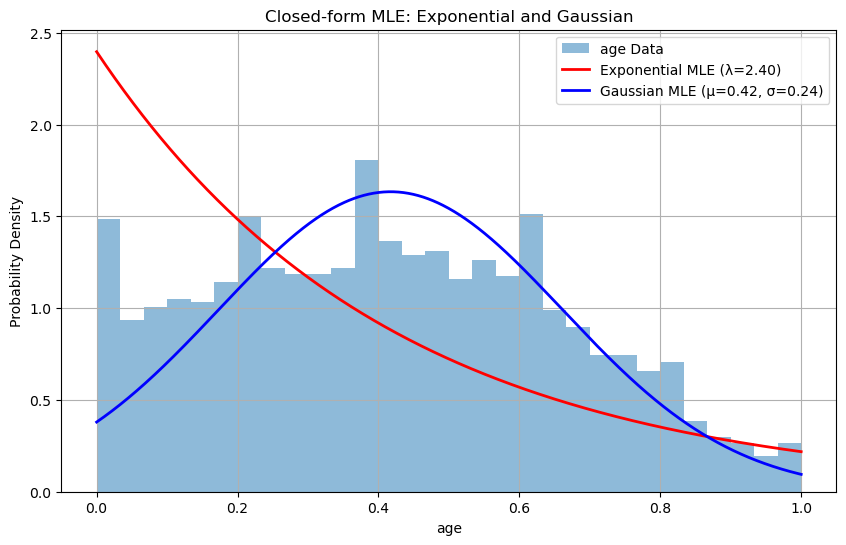

In [9]:
# Closed-form MLE Estimates
age = data['age'].values

# Exponential model: estimate lambda as the inverse of the mean
lambda_exp = 1 / np.mean(age)

# Gaussian model: compute mean and standard deviation (population standard deviation)
mu_gauss = np.mean(age)
sigma_gauss = np.std(age, ddof=0)

# Create a grid for plotting density estimates
x = np.linspace(np.min(age), np.max(age), 1000)

# Compute the closed-form probability density functions (PDFs)
pdf_exp = stats.expon.pdf(x, scale=1 / lambda_exp)
pdf_gauss = stats.norm.pdf(x, loc=mu_gauss, scale=sigma_gauss)

# Plot the histogram overlaid with the closed-form PDFs
plt.figure(figsize=(10, 6))
plt.hist(age, bins=30, density=True, alpha=0.5, label='age Data')
plt.plot(x, pdf_exp, color='red', lw=2, label=f'Exponential MLE (λ={lambda_exp:.2f})')
plt.plot(x, pdf_gauss, color='blue', lw=2, label=f'Gaussian MLE (μ={mu_gauss:.2f}, σ={sigma_gauss:.2f})')
plt.xlabel('age')
plt.ylabel('Probability Density')
plt.title('Closed-form MLE: Exponential and Gaussian')
plt.grid(True)
plt.legend()
plt.show()

Gradient Descent Estimates:
Exponential GD λ: 2.396829121221525
Gaussian GD (μ, σ): [ -95.63321006 3901.88224584]


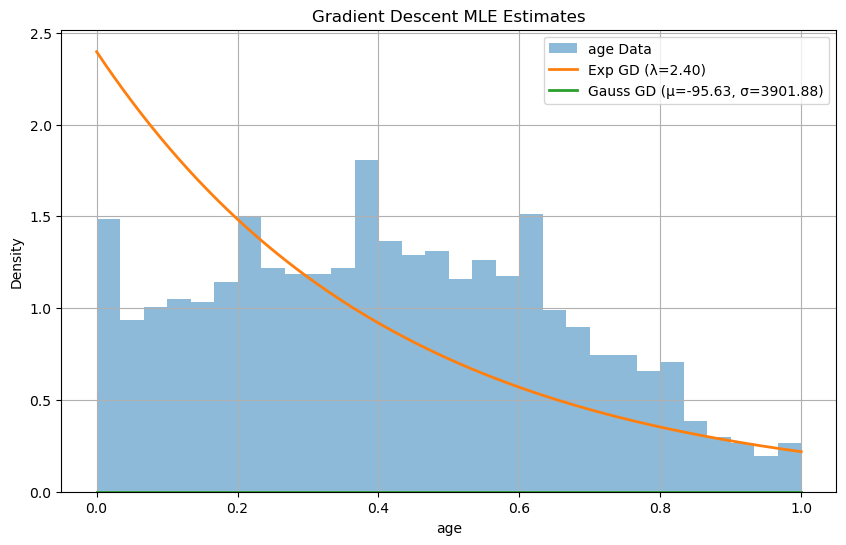

In [10]:
# Gradient Descent Parameter Estimation
def grad_descent(param, grad_func, lr, iterations):
    for _ in range(iterations):
        param = param - lr * grad_func(param)
    return param

n = len(age)
S = np.sum(age)

# Exponential: define the gradient function for lambda.
# The negative log-likelihood gradient for exponential: d/dλ [-n log(λ) + λ S] -> -n/λ + S
grad_exp = lambda lam: -n / lam + S

# Gaussian: gradient for parameters [μ, σ]
def grad_gauss(params):
    mu, sigma = params
    grad_mu = -np.sum(age - mu) / (sigma ** 2)
    grad_sigma = n / sigma - np.sum((age - mu) ** 2) / (sigma ** 3)
    return np.array([grad_mu, grad_sigma])

# Settings for gradient descent
lam0 = 1 / np.mean(age)  # initial guess for exponential
params0 = np.array([np.mean(age), np.std(age, ddof=0)])  # initial guess for Gaussian
iterations = 1000
lr = 1e-4

# Run gradient descent for each model
lam_exp_gd = grad_descent(lam0, grad_exp, lr, iterations)
params_gauss_gd = grad_descent(params0, grad_gauss, lr, iterations)

print("Gradient Descent Estimates:")
print("Exponential GD λ:", lam_exp_gd)
print("Gaussian GD (μ, σ):", params_gauss_gd)

# Plot the density estimates from gradient descent
pdf_exp_gd = stats.expon.pdf(x, scale=1 / lam_exp_gd)  # scale parameter is 1/λ
pdf_gauss_gd = stats.norm.pdf(x, loc=params_gauss_gd[0], scale=params_gauss_gd[1])

plt.figure(figsize=(10, 6))
plt.hist(age, bins=30, density=True, alpha=0.5, label='age Data')
plt.plot(x, pdf_exp_gd, lw=2, label=f'Exp GD (λ={lam_exp_gd:.2f})')
plt.plot(x, pdf_gauss_gd, lw=2, label=f'Gauss GD (μ={params_gauss_gd[0]:.2f}, σ={params_gauss_gd[1]:.2f})')
plt.xlabel('age')
plt.ylabel('Density')
plt.title('Gradient Descent MLE Estimates')
plt.legend()
plt.grid(True)
plt.show()

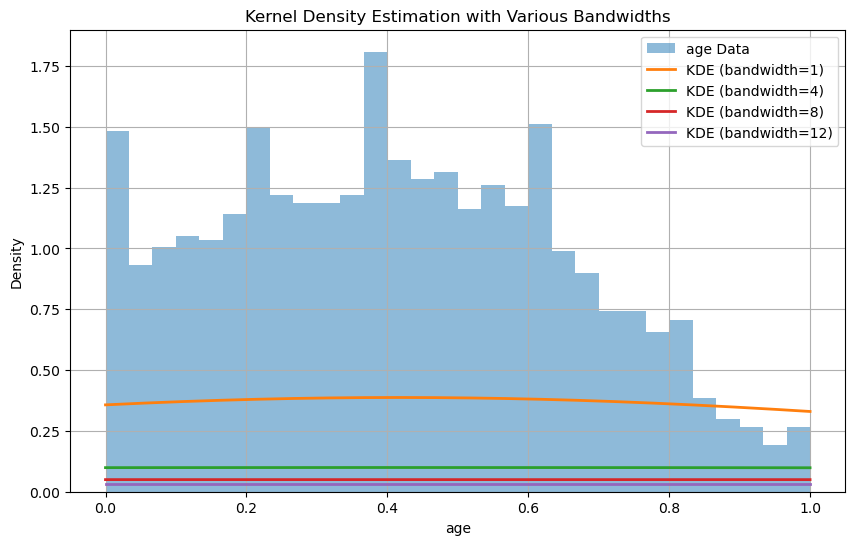

In [11]:
# Manual Kernel Density Estimation (KDE) 
def kde_manual(data, grid, bandwidth):
    return np.sum(np.exp(-0.5 * ((grid[:, None] - data) / bandwidth) ** 2),
                  axis=1) / (len(data) * bandwidth * np.sqrt(2 * np.pi))

# Define various bandwidths to test
bandwidths = [1, 4, 8, 12]

plt.figure(figsize=(10, 6))
plt.hist(age, bins=30, density=True, alpha=0.5, label='age Data')

# Loop over the bandwidth values and plot the corresponding KDE
for bw in bandwidths:
    kde_vals = kde_manual(age, x, bw)
    plt.plot(x, kde_vals, lw=2, label=f'KDE (bandwidth={bw})')

plt.xlabel('age')
plt.ylabel('Density')
plt.title('Kernel Density Estimation with Various Bandwidths')
plt.legend()
plt.grid(True)
plt.show()

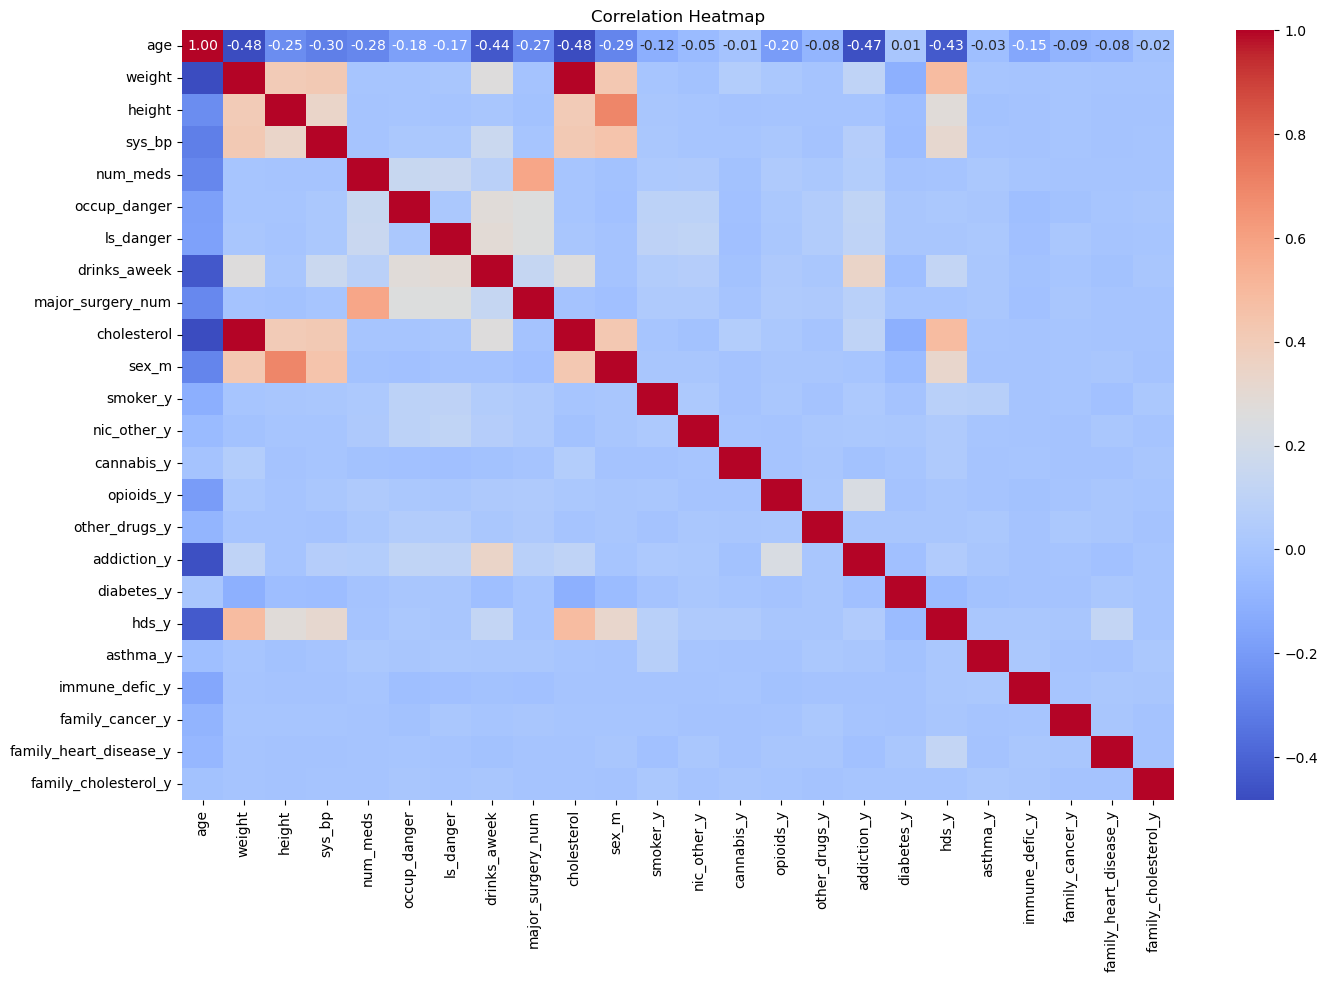

In [12]:
# Correlation heatmap
numeric_df= data.select_dtypes(include=[np.number])

plt.figure(figsize=(16, 10))
sns.heatmap(numeric_df.corr(), 
            annot=True,fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('heatmap.png')
plt.show()

In [13]:
X = data.drop('age', axis=1)
y = data['age']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Calculate benchmark (mean of training set)
benchmark = np.mean(y_train)

# Benchmark predictions for test set
y_pred_benchmark = np.full_like(y_test, benchmark)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_model = model.predict(X_test)

# Metrics for benchmark
rmse_benchmark = np.sqrt(mean_squared_error(y_test, y_pred_benchmark))
mae_benchmark = mean_absolute_error(y_test, y_pred_benchmark)
r2_benchmark = r2_score(y_test, y_pred_benchmark)

# Metrics for linear regression model
rmse_model = np.sqrt(mean_squared_error(y_test, y_pred_model))
mae_model = mean_absolute_error(y_test, y_pred_model)
r2_model = r2_score(y_test, y_pred_model)

# Display results
print(f'Benchmark (Training Set Mean):')
print(f'RMSE: {rmse_benchmark:.4f}')
print(f'MAE: {mae_benchmark:.4f}')
print(f'R²: {r2_benchmark:.4f}')
print()
print(f'Linear Regression Model:')
print(f'RMSE: {rmse_model:.4f}')
print(f'MAE: {mae_model:.4f}')
print(f'R²: {r2_model:.4f}')
print()

# Compare model to benchmark
if rmse_model < rmse_benchmark:
    print('The linear regression model outperforms the benchmark.')
else:
    print('linear regression model does not outperform the benchmark.')

# === K-Fold Cross-Validation ===
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=1)

# Scoring functions
rmse_scorer = make_scorer(mean_squared_error, squared=False)
mae_scorer = make_scorer(mean_absolute_error)
r2_scorer = make_scorer(r2_score)

# Perform cross-validation
rmse_scores = cross_val_score(model, X, y, cv=kf, scoring=rmse_scorer)
mae_scores = cross_val_score(model, X, y, cv=kf, scoring=mae_scorer)
r2_scores = cross_val_score(model, X, y, cv=kf, scoring=r2_scorer)

# Report cross-validation results
print(f'\nK-Fold Cross-Validation (k={k}):')
print(f'Average RMSE: {rmse_scores.mean():.4f}')
print(f'Average MAE:  {mae_scores.mean():.4f}')
print(f'Average R²:   {r2_scores.mean():.4f}')

Benchmark (Training Set Mean):
RMSE: 0.2416
MAE: 0.2023
R²: -0.0000

Linear Regression Model:
RMSE: 0.1476
MAE: 0.1188
R²: 0.6266

✅ The linear regression model outperforms the benchmark.

K-Fold Cross-Validation (k=10):
Average RMSE: 0.1455
Average MAE:  0.1166
Average R²:   0.6443


In [14]:
X = data.drop('age', axis=1)
y = data['age']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Apply Polynomial Features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Get feature names
feature_names = poly.get_feature_names_out(input_features=X.columns)

# Create DataFrame of polynomial features
X_train_poly_df = pd.DataFrame(X_train_poly, columns=feature_names)

# Rank features by standard deviation
feature_importance = X_train_poly_df.std().sort_values(ascending=False)

# Select top 10 features
top_features = feature_importance.head(10)

# Display top generated features
print("\n🔹 Top Polynomial Features by Variance 🔹\n")
print(top_features.to_string())
print(f"\nTotal Features Generated: {X_train_poly_df.shape[1]}")

# Train linear regression model on polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred_model = model.predict(X_test_poly)

# Benchmark: Mean of training target
benchmark = np.mean(y_train)
y_pred_benchmark = np.full_like(y_test, benchmark)

# Metrics for benchmark
rmse_benchmark = np.sqrt(mean_squared_error(y_test, y_pred_benchmark))
mae_benchmark = mean_absolute_error(y_test, y_pred_benchmark)
r2_benchmark = r2_score(y_test, y_pred_benchmark)

# Metrics for model
rmse_model = np.sqrt(mean_squared_error(y_test, y_pred_model))
mae_model = mean_absolute_error(y_test, y_pred_model)
r2_model = r2_score(y_test, y_pred_model)

# Output benchmark and model performance
print(f"\nBenchmark (Mean of Training Target):")
print(f"RMSE: {rmse_benchmark:.4f}")
print(f"MAE:  {mae_benchmark:.4f}")
print(f"R²:   {r2_benchmark:.4f}\n")

print(f"Linear Regression with PolynomialFeatures:")
print(f"RMSE: {rmse_model:.4f}")
print(f"MAE:  {mae_model:.4f}")
print(f"R²:   {r2_model:.4f}")

# K-Fold Cross-Validation
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=1)

# Define scorers
rmse_scorer = make_scorer(mean_squared_error, squared=False)
mae_scorer = make_scorer(mean_absolute_error)
r2_scorer = make_scorer(r2_score)

# Perform cross-validation
rmse_scores = cross_val_score(model, X_train_poly, y_train, cv=kf, scoring=rmse_scorer)
mae_scores = cross_val_score(model, X_train_poly, y_train, cv=kf, scoring=mae_scorer)
r2_scores = cross_val_score(model, X_train_poly, y_train, cv=kf, scoring=r2_scorer)

# Output CV averages
print(f"\nK-Fold Cross-Validation (k={k}):")
print(f"Average RMSE: {rmse_scores.mean():.4f}")
print(f"Average MAE:  {mae_scores.mean():.4f}")
print(f"Average R²:   {r2_scores.mean():.4f}")


🔹 Top Polynomial Features by Variance 🔹

sex_m                0.500035
sex_m^2              0.500035
hds_y^2              0.499047
hds_y                0.499047
family_cancer_y^2    0.477049
family_cancer_y      0.477049
addiction_y^2        0.468887
addiction_y          0.468887
sex_m hds_y          0.464378
occup_danger^2       0.426123

Total Features Generated: 299

Benchmark (Mean of Training Target):
RMSE: 0.2416
MAE:  0.2023
R²:   -0.0000

Linear Regression with PolynomialFeatures:
RMSE: 0.1473
MAE:  0.1180
R²:   0.6283

K-Fold Cross-Validation (k=10):
Average RMSE: 0.1438
Average MAE:  0.1141
Average R²:   0.6554


In [15]:
data.head()

,age,weight,height,sys_bp,num_meds,occup_danger,ls_danger,drinks_aweek,major_surgery_num,cholesterol,...,opioids_y,other_drugs_y,addiction_y,diabetes_y,hds_y,asthma_y,immune_defic_y,family_cancer_y,family_heart_disease_y,family_cholesterol_y
0,0.789474,0.453532,0.724138,0.610619,0.000000,0.0,0.0,0.108108,0.0000,0.447761,...,0,0,0,0,1,0,0,1,0,1
1,0.431579,0.539033,0.689655,0.389381,0.000000,0.0,0.0,0.162162,0.0000,0.541045,...,0,0,1,0,0,0,0,0,0,0
2,0.063158,0.371747,0.413793,0.398230,0.132075,0.0,0.5,0.432432,0.1875,0.373134,...,0,0,1,0,1,0,0,0,0,0
3,0.178947,0.546468,0.551724,0.530973,0.018868,0.5,1.0,0.432432,0.1250,0.541045,...,0,0,0,0,1,0,0,0,0,0
4,0.715789,0.319703,0.344828,0.212389,0.037736,1.0,1.0,0.702703,0.1250,0.320896,...,0,0,1,0,0,0,0,0,0,0


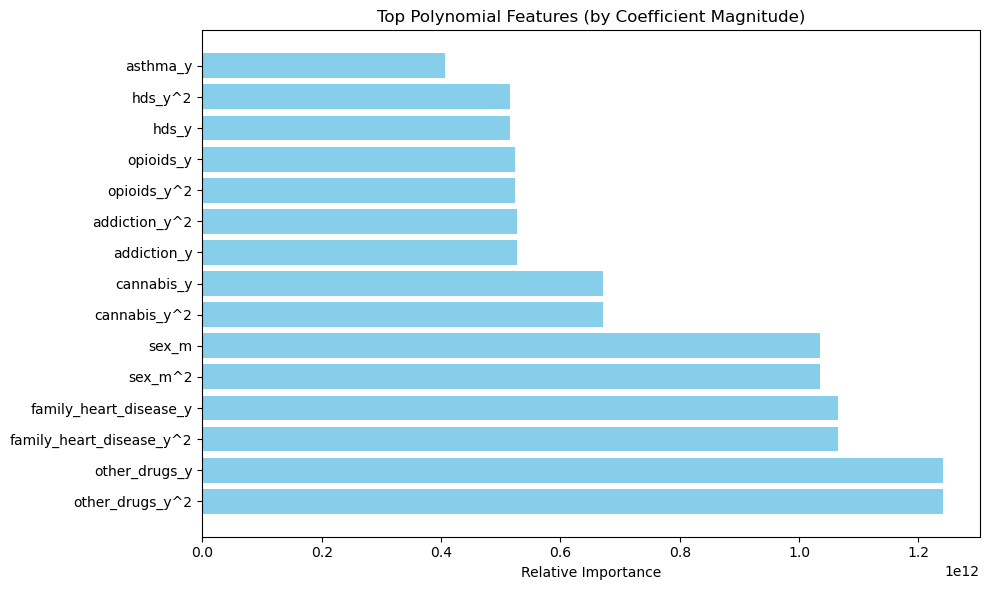

In [16]:
coefs = model.coef_

# Custom settings
top_n = 15
threshold = 0.01  # minimum magnitude to be considered "important"

# Filter coefficients by threshold
important_indices = np.where(np.abs(coefs) > threshold)[0]

# Sort and keep top N
indices = important_indices[np.argsort(np.abs(coefs[important_indices]))[-top_n:]]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Top Polynomial Features (by Coefficient Magnitude)")
plt.barh(range(len(indices)), np.abs(coefs[indices]), color='skyblue')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

# Define features and target
X = data.drop('age', axis=1)
y = data['age']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_jobs=-1, max_depth=10, random_state=1)
rf_model.fit(X_train, y_train)
y_pred_model = rf_model.predict(X_test)

# Benchmark: mean of training target
benchmark = np.mean(y_train)
y_pred_benchmark = np.full_like(y_test, benchmark)

# Evaluate benchmark
rmse_benchmark = np.sqrt(mean_squared_error(y_test, y_pred_benchmark))
mae_benchmark = mean_absolute_error(y_test, y_pred_benchmark)
r2_benchmark = r2_score(y_test, y_pred_benchmark)

# Evaluate Random Forest
rmse_model = np.sqrt(mean_squared_error(y_test, y_pred_model))
mae_model = mean_absolute_error(y_test, y_pred_model)
r2_model = r2_score(y_test, y_pred_model)

# Display comparison
print(f"\nBenchmark (Training Mean):")
print(f"RMSE: {rmse_benchmark:.4f}")
print(f"MAE:  {mae_benchmark:.4f}")
print(f"R²:   {r2_benchmark:.4f}\n")

print(f"Random Forest Regressor (Original Features):")
print(f"RMSE: {rmse_model:.4f}")
print(f"MAE:  {mae_model:.4f}")
print(f"R²:   {r2_model:.4f}")

# Cross-validation setup
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=1)
rmse_scorer = make_scorer(mean_squared_error, squared=False)
mae_scorer = make_scorer(mean_absolute_error)
r2_scorer = make_scorer(r2_score)

# CV evaluation
rmse_scores = cross_val_score(rf_model, X, y, cv=kf, scoring=rmse_scorer, n_jobs=-1)
mae_scores = cross_val_score(rf_model, X, y, cv=kf, scoring=mae_scorer, n_jobs=-1)
r2_scores = cross_val_score(rf_model, X, y, cv=kf, scoring=r2_scorer, n_jobs=-1)

print(f"\nK-Fold Cross-Validation (k={k}):")
print(f"Average RMSE: {rmse_scores.mean():.4f}")
print(f"Average MAE:  {mae_scores.mean():.4f}")
print(f"Average R²:   {r2_scores.mean():.4f}")


Benchmark (Training Mean):
RMSE: 0.2416
MAE:  0.2023
R²:   -0.0000

Random Forest Regressor (Original Features):
RMSE: 0.1534
MAE:  0.1234
R²:   0.5966

K-Fold Cross-Validation (k=10):
Average RMSE: 0.1506
Average MAE:  0.1203
Average R²:   0.6187


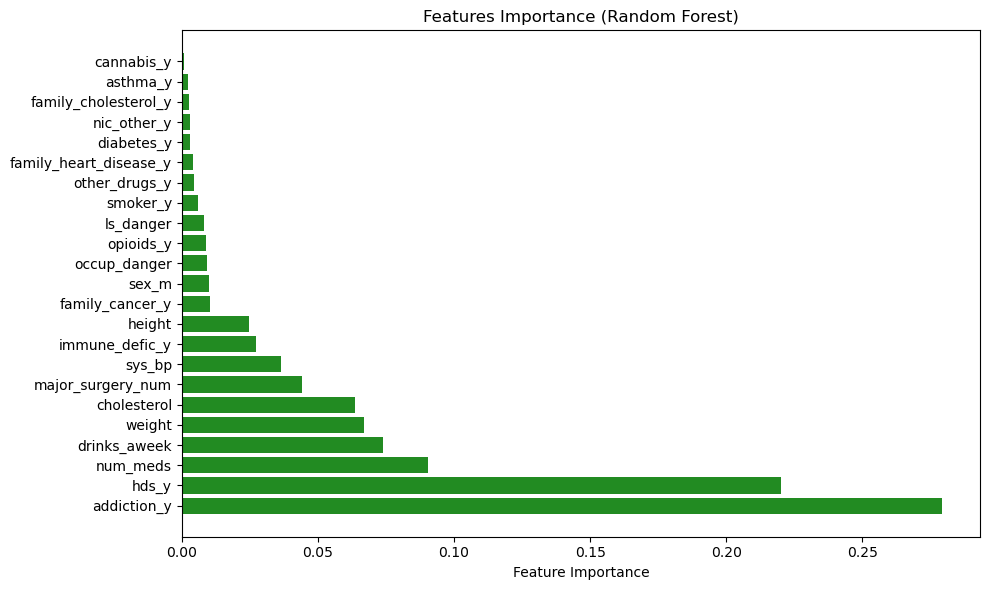

In [18]:
# Feature importance plot
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Features Importance (Random Forest)")
plt.barh(range(len(indices)), importances[indices], align='center', color='forestgreen')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [19]:
# === 3. Classification: Predicting Smoker Status ===
header = data.columns
header = header[11:]

for item in header:
    print(item)
    
    print("\n--- Classification Analysis:---\n")

    X_cls = data.drop([item], axis=1)
    y_cls = data[item]

    Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

    # Logistic Regression with class weight adjustment
    log_clf = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
    log_clf.fit(Xc_train, yc_train)
    y_pred_cls = log_clf.predict(Xc_test)

    print(classification_report(yc_test, y_pred_cls))

smoker_y

--- Classification Analysis:---

              precision    recall  f1-score   support

           0       0.85      0.61      0.71      1596
           1       0.27      0.57      0.37       404

    accuracy                           0.61      2000
   macro avg       0.56      0.59      0.54      2000
weighted avg       0.73      0.61      0.64      2000

nic_other_y

--- Classification Analysis:---

              precision    recall  f1-score   support

           0       0.84      0.59      0.69      1563
           1       0.29      0.58      0.38       437

    accuracy                           0.59      2000
   macro avg       0.56      0.59      0.54      2000
weighted avg       0.72      0.59      0.62      2000

cannabis_y

--- Classification Analysis:---

              precision    recall  f1-score   support

           0       0.98      0.60      0.74      1953
           1       0.03      0.57      0.06        47

    accuracy                           0.60     

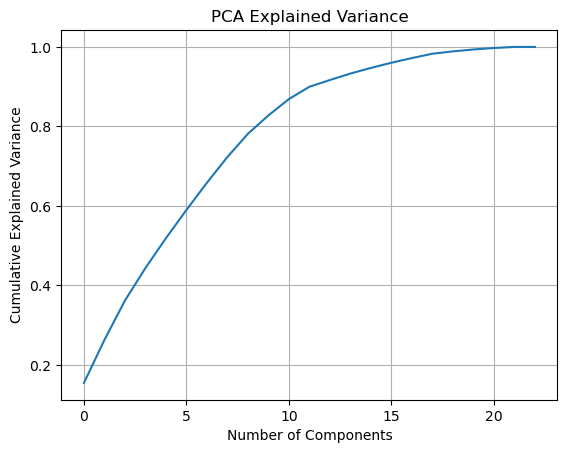

In [20]:
# PCA
pca = PCA()
pca_result = pca.fit_transform(X)

# Explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.savefig('pca.png')
plt.show()

In [21]:
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components= 10)
X_pca = pca.fit_transform(data_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.16006905 0.0935896  0.05750175 0.04769148 0.04602612 0.04566654
 0.04470788 0.04299481 0.0423397  0.04156789]


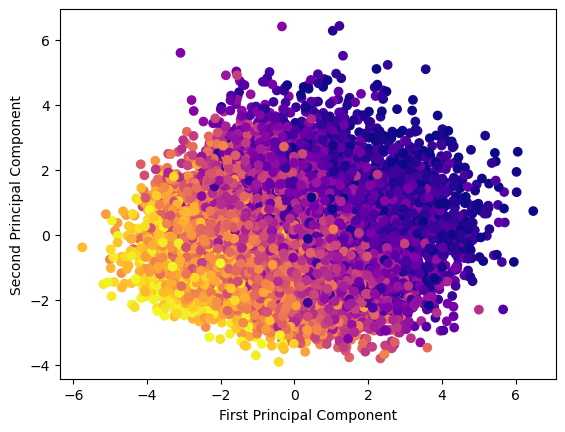

In [22]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()